# Exploration of Results
Orion Junkins
Sepember 6, 2024

## Setup and Imports
Define needed filepaths and import needed utilities

In [1]:
import os
import numpy as np

from results_exploration_helpers import *

root = "/Volumes/eeg"

channel_names = np.load(os.path.join(root, "channel_names.npy"))
freqs = np.load(os.path.join(root, "freqs.npy"))

ICA_COMPS = 0.9999
root = "/Volumes/eeg"
connectivity_dir = os.path.join(root, "connectivity_scores")
expert_dir = os.path.join(connectivity_dir, "expert")
novice_dir = os.path.join(connectivity_dir, "novice")

## Average Delta Connectivity for a Single Subject
All pre-processing and calculation of needed connectivity matrices is complete, but a more calculation is required to turn these raw connectivity metrics into meaningful results. Connectivity data are stored in ".npy" files as 3 dimensional matrices. 

Lets load all of the data for expert 5b, and inspect the shape of the Baseline No Gesture array.

In [2]:
BL_NoG_data, BL_WiG_data, NoG_data, WiG_data = load_single_connectivity(expert_dir, "5b")

BL_NoG_data.shape

(12, 12, 24)

The array is 12 x 12 x 24 denoting 12 electrodes x 12 electrodes x 24 frequencies. Note that the other three arrays have the same shape. Lets isolate delta (0.5 - 4hz) for the BL_NoG data.

In [3]:
# Print the 24 frequencies:
print("Frequencies: ", freqs)

# Isolate the indices for the delta frequencies
delta_freqs =[x for x in freqs if 0.5 <= x <= 4]
delta_freqs_idx = [i for i, x in enumerate(freqs) if 0.5 <= x <= 4]
print("Delta Frequencies: ", delta_freqs)

# Isolate the delta frequencies in BL_NoG_data
BL_NoG_delta = BL_NoG_data[:, :, delta_freqs_idx]

# Print the new shape
print("BL_NoG_delta shape: ", BL_NoG_delta.shape)

Frequencies:  [ 0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5  7.
  7.5  8.   8.5  9.   9.5 10.  10.5 11.  11.5 12. ]
Delta Frequencies:  [0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0]
BL_NoG_delta shape:  (12, 12, 8)


Note that the data is now 12 x 12 x 4 denoting 12 electrodes x 12 electrodes x 8 frequencies in the delta range. To simplify, lets now average across delta, and again print the resulting shape.

In [4]:
BL_NoG_delta_avg = np.mean(BL_NoG_delta, axis=2)
print("BL_NoG_delta_avg shape: ", BL_NoG_delta_avg.shape)

BL_NoG_delta_avg shape:  (12, 12)


We now have a 12 x 12 matrix that shows the average delta connectivity for a single subject's Baseline No Gesture data. Let's plot this connectivity:

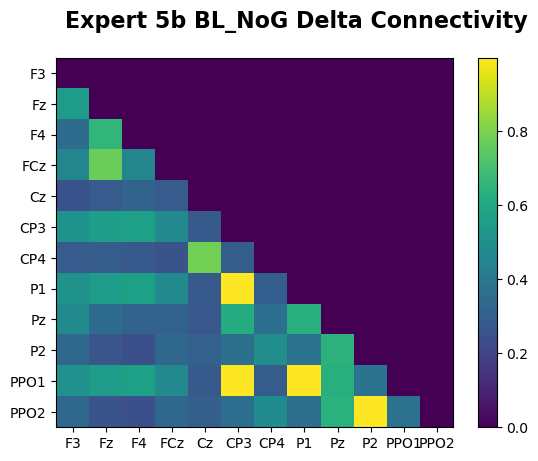

In [5]:
plot_single_connectivity(BL_NoG_delta_avg, channel_names, "Expert 5b BL_NoG Delta Connectivity")

To make things a bit easier, the above functionality has been wrapped in a function: `average_single_over_freq_range(data, freqs, start, end)` that will isolate the frequencies between the given start and end (inclusive), average over them, and return the new data array. 

The following call gives the same result as before:

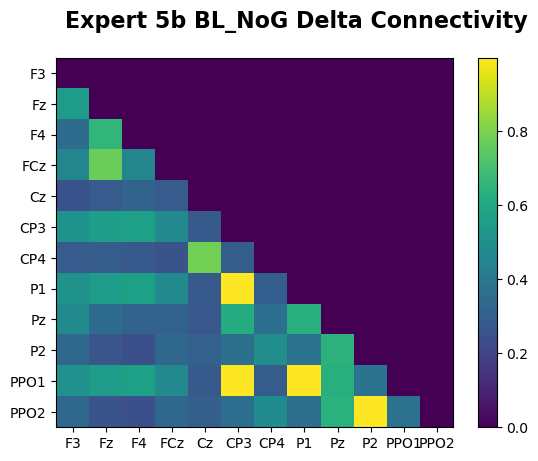

In [6]:
BL_NoG_delta_avg = average_single_over_freq_range(BL_NoG_data, freqs, 0.5, 4)
plot_single_connectivity(BL_NoG_delta_avg, channel_names, "Expert 5b BL_NoG Delta Connectivity")

Extending to more frequency ranges is easy:

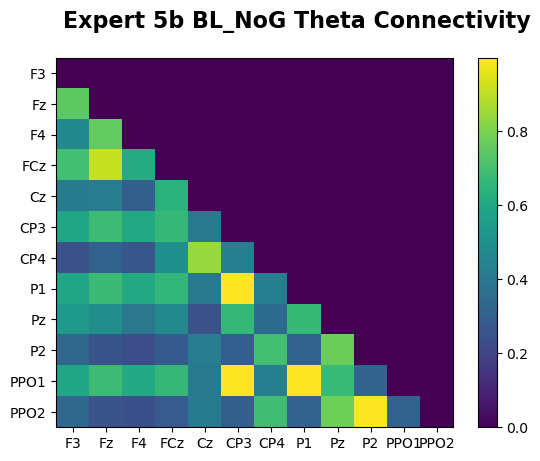

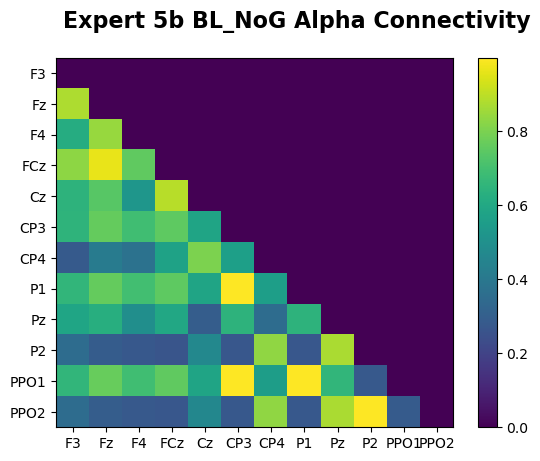

In [7]:
BL_NoG_theta_avg = average_single_over_freq_range(BL_NoG_data, freqs, 4, 8)
BL_NoG_alpha_avg = average_single_over_freq_range(BL_NoG_data, freqs, 8, 12)

plot_single_connectivity(BL_NoG_theta_avg, channel_names, "Expert 5b BL_NoG Theta Connectivity")
plot_single_connectivity(BL_NoG_alpha_avg, channel_names, "Expert 5b BL_NoG Alpha Connectivity")

Applying to the rest of this subjects data is also easy:

In [8]:
BL_NoG_delta_avg = average_single_over_freq_range(BL_NoG_data, freqs, 0.5, 4)
BL_WiG_delta_avg = average_single_over_freq_range(BL_WiG_data, freqs, 0.5, 4)
NoG_delta_avg = average_single_over_freq_range(NoG_data, freqs, 0.5, 4)
WiG_delta_avg = average_single_over_freq_range(WiG_data, freqs, 0.5, 4)

## Extending to Multiple Subjects

Lets know look at multiple subjects, starting first with experts. 

In [9]:
all_expert_BL_NoG, all_expert_BL_WiG, all_expert_NoG, all_expert_WiG = load_all_connectivity(expert_dir)

Loaded 5b
Loaded 9b
Loaded 10b
Loaded 10c1
Loaded 7c
Skipping 6 due to missing files
Skipping 11 due to missing files
Loaded 8
Loaded 5c
Loaded 10c2
Loaded 11c
Loaded 22
Loaded 12
Skipping 13b due to missing files
Loaded 17
Loaded 20


Again, let's inspect the shape of what we got back. 

In [10]:
print("Shape of all_expert_BL_NoG: ", all_expert_BL_NoG.shape)

Shape of all_expert_BL_NoG:  (13, 12, 12, 24)


We see 13 x 12 x 12 x 24, denoting 13 experts x 12 electrodes x 12 electrodes x 24 frequencies. Lets condense down to the delta averages just as we did before, and again inspect the shapes.

In [11]:
all_expert_BL_NoG_delta_avg = average_all_over_freq_range(all_expert_BL_NoG, freqs, 0.5, 4)
all_expert_BL_WiG_delta_avg = average_all_over_freq_range(all_expert_BL_WiG, freqs, 0.5, 4)
all_expert_NoG_delta_avg = average_all_over_freq_range(all_expert_NoG, freqs, 0.5, 4)
all_expert_WiG_delta_avg = average_all_over_freq_range(all_expert_WiG, freqs, 0.5, 4)

print("Shape of all_expert_BL_NoG_delta_avg: ", all_expert_BL_NoG_delta_avg.shape)

Shape of all_expert_BL_NoG_delta_avg:  (13, 12, 12)


As before, the 24 frequencies were cropped to only those in the range we desired, then averaged into a single dimension. This gives 13 experts x 12 electrodes x 12 electrodes as the final shape. Let's repeat this procedure with Novices so we can begin to compare the groups.

We will focus on delta for now, but this could easily be extended to other frequency ranges.

In [12]:
all_novice_BL_NoG, all_novice_BL_WiG, all_novice_NoG, all_novice_WiG = load_all_connectivity(novice_dir)
all_novice_BL_NoG_delta_avg = average_all_over_freq_range(all_novice_BL_NoG, freqs, 0.5, 4)    
all_novice_BL_WiG_delta_avg = average_all_over_freq_range(all_novice_BL_WiG, freqs, 0.5, 4)
all_novice_NoG_delta_avg = average_all_over_freq_range(all_novice_NoG, freqs, 0.5, 4)
all_novice_WiG_delta_avg = average_all_over_freq_range(all_novice_WiG, freqs, 0.5, 4)

Loaded 5b
Skipping 6 due to missing files
Loaded 6c
Loaded 8c
Loaded 9c
Loaded 14
Loaded 15b
Loaded 17b


## Calculate Statistics
This section calculates mean and standard deviation for each subset enabling group comparison. This section also performs T tests to calculate the p-value for each electrode pair to determine the significance of the group differences. 

To simplify we will ignore gestures for now.

In [39]:
all_novice_BL = np.concatenate((all_novice_BL_NoG_delta_avg, all_novice_BL_WiG_delta_avg), axis=0)
all_novice_non_BL = np.concatenate((all_novice_NoG_delta_avg, all_novice_WiG_delta_avg), axis=0)

all_expert_BL = np.concatenate((all_expert_BL_NoG_delta_avg, all_expert_BL_WiG_delta_avg), axis=0)
all_expert_non_BL = np.concatenate((all_expert_NoG_delta_avg, all_expert_WiG_delta_avg), axis=0)


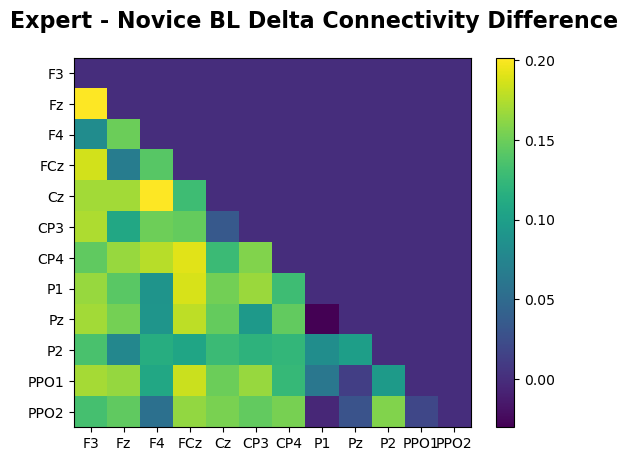

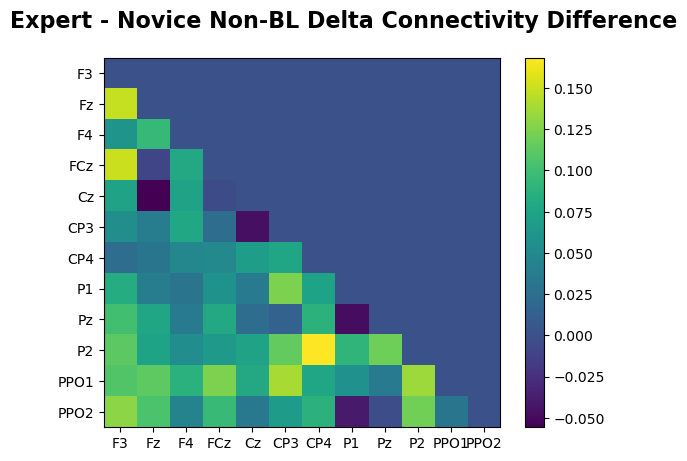

In [41]:
group_mean_novice_BL = np.mean(all_novice_BL, axis=0)
group_mean_novice_non_BL = np.mean(all_novice_non_BL, axis=0)

group_mean_expert_BL = np.mean(all_expert_BL, axis=0)
group_mean_expert_non_BL = np.mean(all_expert_non_BL, axis=0)

BL_difference = group_mean_expert_BL - group_mean_novice_BL
non_BL_difference = group_mean_expert_non_BL - group_mean_novice_non_BL

plot_single_connectivity(BL_difference, channel_names, "Expert - Novice BL Delta Connectivity Difference")
plot_single_connectivity(non_BL_difference, channel_names, "Expert - Novice Non-BL Delta Connectivity Difference")

In [30]:
from scipy.stats import ttest_ind

def get_element_wise_p_values(expert_data, novice_data):
    p_values = np.zeros((expert_data.shape[1], expert_data.shape[2]))
    for i in range(expert_data.shape[1]):
        for j in range(expert_data.shape[2]):
            expert = expert_data[:, i, j]
            novice = novice_data[:, i, j]
            t_stat, p_value = ttest_ind(expert, novice)
            p_values[i, j] = p_value
    return p_values

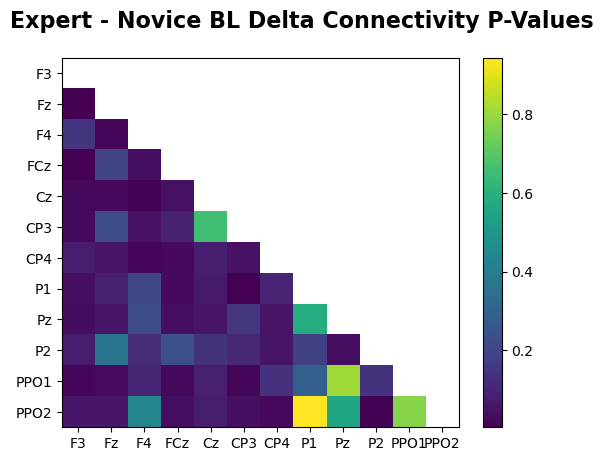

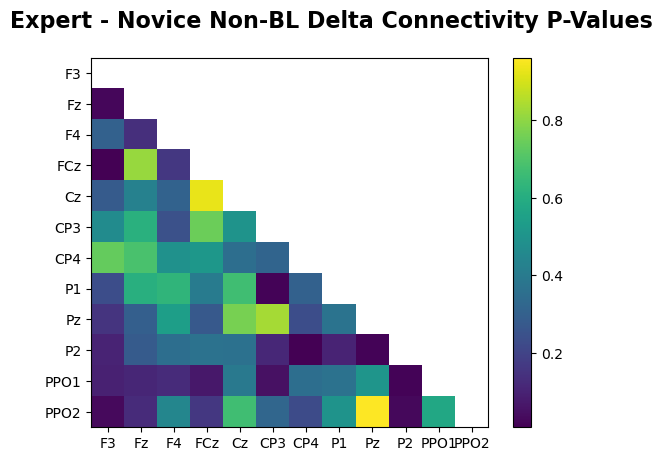

In [42]:
BL_p_values = get_element_wise_p_values(all_expert_BL, all_novice_BL)
non_BL_p_values = get_element_wise_p_values(all_expert_non_BL, all_novice_non_BL)

plot_single_connectivity(BL_p_values, channel_names, "Expert - Novice BL Delta Connectivity P-Values")
plot_single_connectivity(non_BL_p_values, channel_names, "Expert - Novice Non-BL Delta Connectivity P-Values")

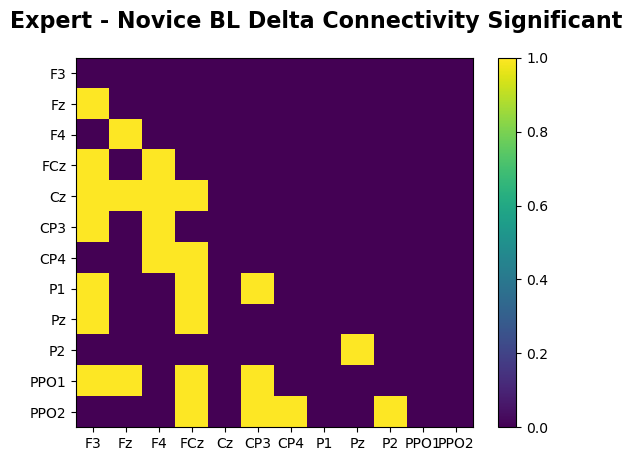

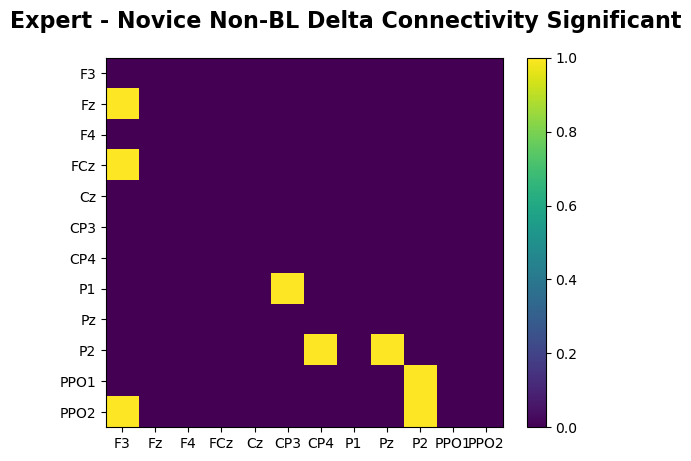

In [44]:
significant_BL = BL_p_values < 0.05
significant_non_BL = non_BL_p_values < 0.05

plot_single_connectivity(significant_BL, channel_names, "Expert - Novice BL Delta Connectivity Significant")
plot_single_connectivity(significant_non_BL, channel_names, "Expert - Novice Non-BL Delta Connectivity Significant")